# 2. ML with Torch

## 2-1. 지도학습
> 정답(Label)이 포함된 데이터 셋을 이용해 학습  

분류(classification): 정해진 범주에 따라 분류  
회귀(regression): 특성(feature)을 기준으로 연속된 값을 그래프로 표현하여 패턴이란 트랜드 예측  

### KNN (K-Nearest Neighbor)
- K-최근접 이웃 (분류)
- 과거 데이터를 저장해두고 비교 수행

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

dataset = pd.read_csv("./iris.data", names=["sepal-length", "sepal-width", "petal-length", "petal-width", "Class"])

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [33]:
s = StandardScaler()
X_train = s.fit_transform(X_train)
X_test = s.fit_transform(X_test)

In [42]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
metrics.accuracy_score(y_pred, y_test)

0.7333333333333333

In [50]:
# 최적의 K값 찾기 (하이퍼파리미터 튜닝)
acc_arr = np.zeros(10)
for k in np.arange(1, 10+1):
    clf = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = metrics.accuracy_score(y_pred, y_test)
    acc_arr[k-1] = acc
    
max_acc = np.amax(acc_arr)
acc_list = list(acc_arr)
print(f"Best K = {acc_list.index(max_acc)+1} with {max_acc}")

Best K = 4 with 0.7333333333333333


### SVM (Support Vector Machine)
- 분류를 위한 기준선을 정의하는 모델  
- 결정 경계(기준선)를 기준으로 경계의 어느 쪽에 속하는지 분류하는 모델
- 마진(margin): 결정 경계와 서포트 벡터 사이의 거리 -> 마진을 최대로하는 것이 목적 -> 이상치
- 서포트 벡터: 결정 경계와 가까이 있는 데이터들
- 이상치를 허용 -> 소프트 마진 / 허용 안함 -> 하드 마진

In [52]:
from sklearn import svm

# 커널 = 선형/비선형
# C가 크면 하드 마진, 작으면 소프트 마진
# gamma = 경계의 유연도 (민감도)
svm = svm.SVC(kernel="linear", C=1., gamma=.5)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

metrics.accuracy_score(y_pred, y_test)

0.7

### 결정트리 (Decision Tree)
- 분류 영역의 순도(homogeneity)는 증가, 불순도(impurity)와 불확실성(uncertainty)은 감소하는 방향으로 학습 진행 -> 정보 획득(information gain)

#### 엔트로피 (Entropy)
- 확률 변수의 불확실성을 수치로 나타낸 것
- 높을수록 불확실성이 높다는 의미 -> 엔트로피를 낮추는것이 목적
- 지니 계수(Gini Index)

In [53]:
titanic = pd.read_csv("./train.csv", index_col="PassengerId")

titanic.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [57]:
df = titanic[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Survived"]].copy()
df["Sex"] = df["Sex"].map({"male":0, "female":1})
df = df.dropna()

X = df.drop("Survived", axis=1)
y = df["Survived"]

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [62]:
y_pred = model.predict(X_test)

metrics.accuracy_score(y_pred, y_test)

0.7202797202797203

In [65]:
metrics.confusion_matrix(y_test, y_pred)

array([[66, 21],
       [19, 37]], dtype=int64)

### 로지스틱 회귀 (Logistic Regression)
- 사건의 확률 (0~1)

In [69]:
from sklearn.datasets import load_digits

mnist = load_digits()

mnist.data.shape, mnist.target.shape

((1797, 64), (1797,))

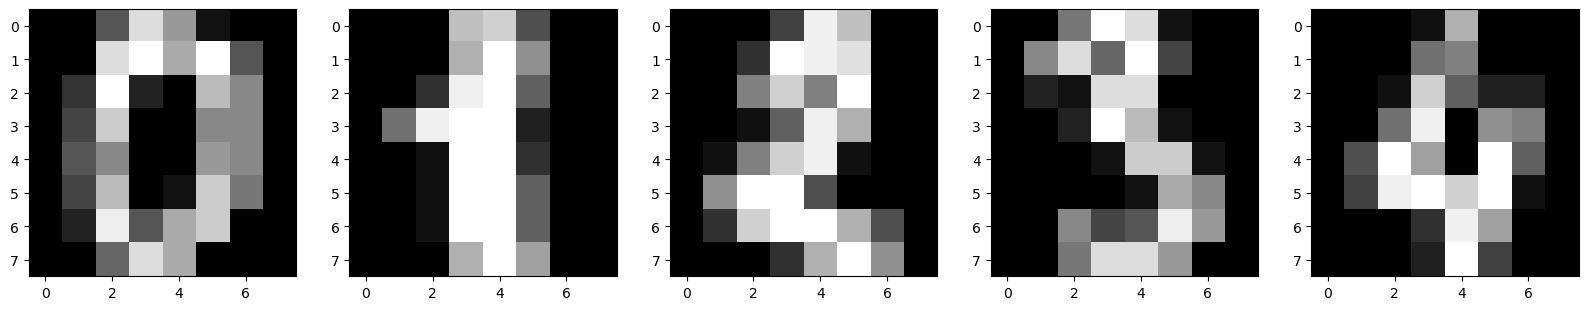

In [70]:
plt.figure(figsize=(20, 4))
for idx, (img, label) in enumerate(zip(mnist.data[0:5], mnist.target[0:5])):
    plt.subplot(1, 5, idx+1)
    plt.imshow(np.reshape(img, (8, 8)), cmap=plt.cm.gray)

In [75]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.2, random_state=42)

clf_logitreg = LogisticRegression()
clf_logitreg.fit(X_train, y_train)

c:\Users\nuyhc\anaconda3\envs\torch\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [77]:
print(clf_logitreg.predict(X_test[0].reshape(1, -1))) # 단일 이미지
print(clf_logitreg.predict(X_test[:10])) # 여러장

[6]
[6 9 3 7 2 1 5 2 5 2]


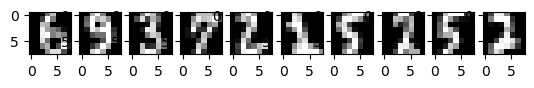

In [86]:
for idx, img in enumerate(X_test[:10].tolist()):
    plt.subplot(1, 10, idx+1)
    plt.imshow(np.reshape(img, (8, 8)), cmap=plt.cm.gray)

In [87]:
preds = clf_logitreg.predict(X_test)
clf_logitreg.score(X_test, y_test)

0.9694444444444444

### 선형 회귀 (Linear Regression)
- 단순 선형 회귀 (Simple Linear Regression) / 다중 선형 회귀 (Multiple Linear Regression)

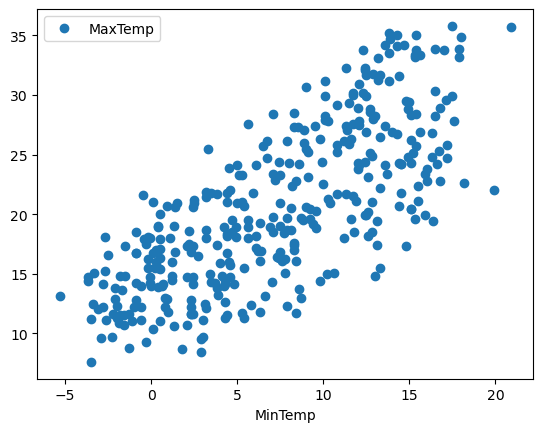

In [91]:
from sklearn.linear_model import LinearRegression

dataset = pd.read_csv("./weather.csv")

dataset.plot(x="MinTemp", y="MaxTemp", style="o");

In [95]:
X = dataset["MinTemp"].values.reshape(-1, 1) # 독립변수
y = dataset["MaxTemp"].values.reshape(-1, 1) # 종속변수
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

result = pd.DataFrame({"Actual":y_test.flatten(), "Pred":y_pred.flatten()})
result

,Actual,Pred
0,23.1,24.892511
1,11.1,14.028978
2,19.7,21.024435
3,20.9,20.695237
4,15.2,12.300689
...,...,...
69,34.9,29.336683
70,28.2,22.835024
71,18.2,24.892511
72,16.7,14.605075


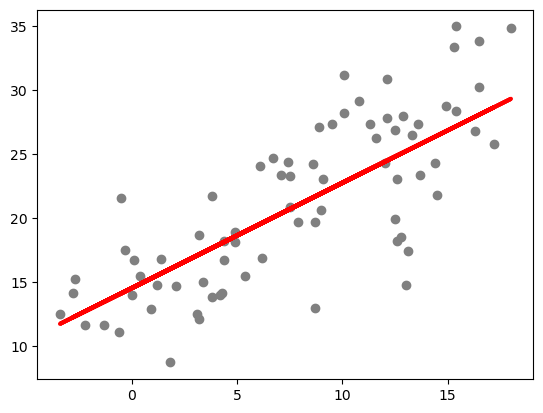

In [96]:
plt.scatter(X_test, y_test, color="gray")
plt.plot(X_test, y_pred, color="red", linewidth=3)
plt.show()

In [98]:
f"MSE = {metrics.mean_squared_error(y_test, y_pred):.2f}"

'MSE = 16.73'

## 2-2. 비지도 학습
> 레이블이 필요하지 않으며 정답이 없는 상태에서 훈련시키는 방식

군집화(Clustering) / 차원축소(Dimensionality Reduction)

### K-평균 군집화 (K-Means)
1. 중심점 선택
2. 클러스터 할당
3. 새로운 중심점 선택
4. 범위 확인

In [99]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

dataset = pd.read_csv("./sales data.csv")
dataset.head(3)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844


In [103]:
for cate in ["Channel", "Region"]:
    dataset = pd.concat([dataset, pd.get_dummies(dataset[cate], prefix=cate)], axis=1)
    dataset = dataset.drop(cate, axis=1)

dataset.head(3)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3
0,12669,9656,7561,214,2674,1338,0,1,0,0,1
1,7057,9810,9568,1762,3293,1776,0,1,0,0,1
2,6353,8808,7684,2405,3516,7844,0,1,0,0,1


In [104]:
mms = MinMaxScaler()
data_trans = mms.fit_transform(dataset)

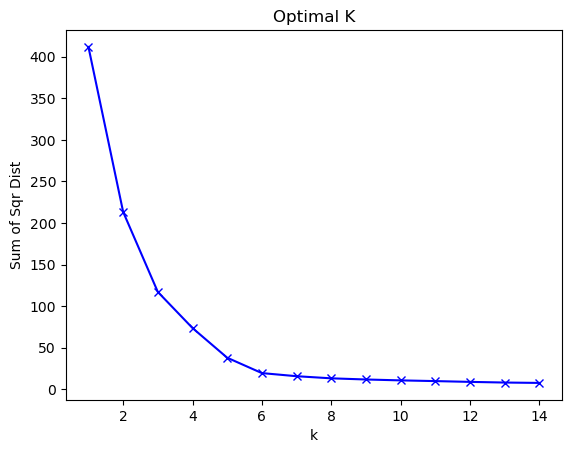

In [112]:
# find best K
sum_of_squared_distance = []
for k in range(1, 15):
    km = KMeans(n_clusters=k).fit(data_trans)
    sum_of_squared_distance.append(km.inertia_)
    
plt.plot(range(1, 15), sum_of_squared_distance, "bx-")
plt.xlabel("k")
plt.ylabel("Sum of Sqr Dist")
plt.title("Optimal K")
plt.show()

### PCA (주성분 분석)